<a href="https://colab.research.google.com/github/YungKing1224/Python-data-science/blob/main/brazil_houses__to_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Brazilian houses to rent data set from kaggle:
https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent

The objective of this project is to study trends on houses in Brazil and also build a machine learning model that will predict the prices.


Table of content:
1. Data Understanding and Exploration
2. Data Cleaning
3. Feature Engineering
4. Model Development
5. Model Evaluation
6. Rent Price Prediction


hoa = homeowners association tax

plot color=['orange', 'mediumaquamarine', 'dodgerblue', 'crimson', 'mediumpurple'])

# **1. Data Understanding and Exploration**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('houses_to_rent_v2.csv')
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Let us look at the column names as it seems there are some unnamed columns.

In [3]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [4]:
df.shape

(10692, 13)

The data frame has 6080 rows adn 14 columns.
Let us look at the data types of the different columns.

In [5]:
df.dtypes

,0
city,object
area,int64
rooms,int64
bathroom,int64
parking spaces,int64
floor,object
animal,object
furniture,object
hoa (R$),int64
rent amount (R$),int64


floor is object but it has numbers written so we will convert it into int.

In [6]:
df['floor'] = pd.to_numeric(df['floor'], errors='coerce').astype('Int64')
df.dtypes

,0
city,object
area,int64
rooms,int64
bathroom,int64
parking spaces,int64
floor,Int64
animal,object
furniture,object
hoa (R$),int64
rent amount (R$),int64


In [7]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# **Note:**

This data exploration is simply to explore pattern from the data without cleaning it yet. A lot of the charts did not show a consistent pattern, this is something that will be addressed by looking at outliers or missing values, etc.

enumerate(amount_list): This gives you both the index i and the value amount for each iteration. The a tuple where first element is index and second element is amount.

In [8]:
color_list = ['orange', 'mediumaquamarine', 'dodgerblue', 'crimson', 'mediumpurple']
amount_list = ['hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']

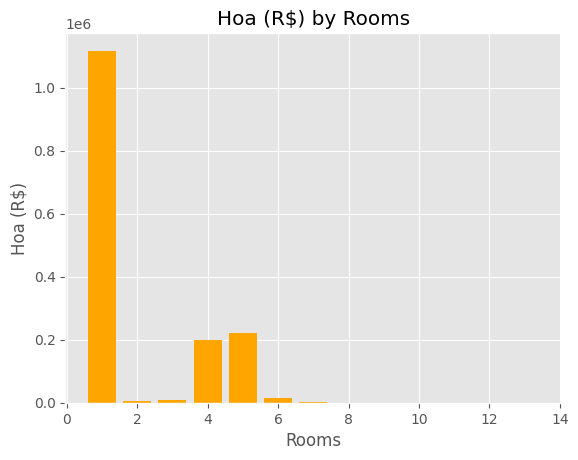

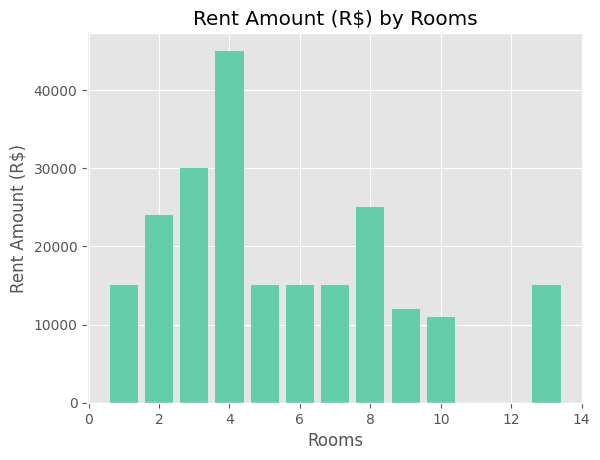

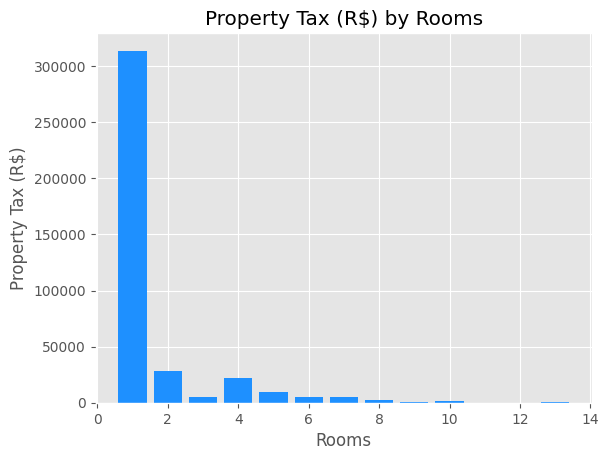

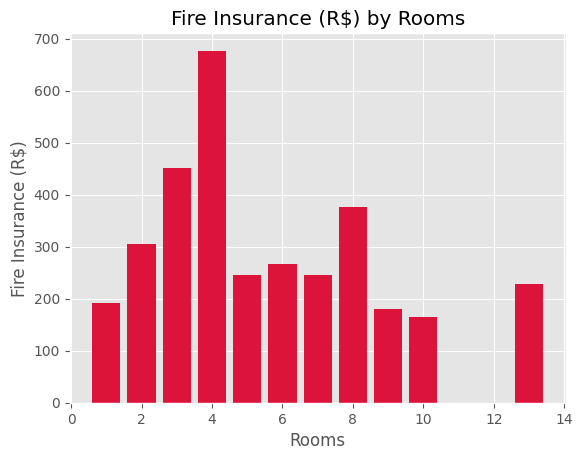

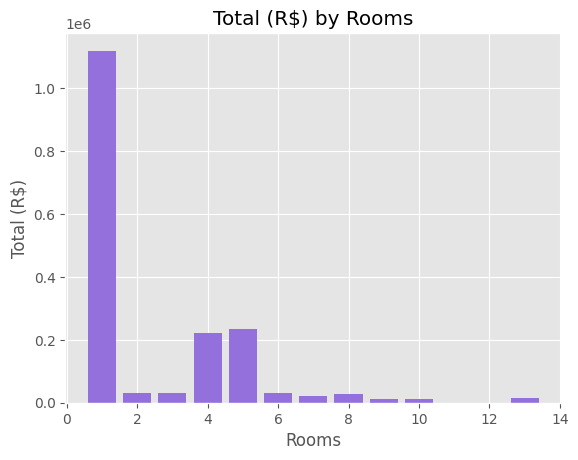

In [9]:
for i, amount in enumerate(amount_list):
    plt.bar(df['rooms'], df[amount], color=color_list[i])  # Use the index 'i' to access the color
    plt.xlabel('Rooms')
    plt.ylabel(amount.title())
    plt.title(f'{amount.title()} by Rooms')
    plt.show()

**NB:** all of the observations are just preliminary observations without context or data cleaning so there could be errors in the following charts. this are just to paint a picture of the initial data and their try identify patterns.

The following charts are to understand how the different fees vary by Rooms. To keep it short all of the charts did not have a consistent pattern in trends based on the number of rooms.

Another observation is that 1 Room has the highest amount on 3/5 of the charts, while 11 and 12 Rooms have the lowest on all the charts.

In [10]:
df.loc[df['rooms'] == 9]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
9565,São Paulo,400,9,4,4,<NA>,acept,not furnished,100,12000,500,181,12780


This was to check if 9 rooms was in the data as the previous data did not have one.

In [11]:
df.groupby('rooms')['total (R$)'].max().sort_values(ascending=False)

,total (R$)
rooms,
1,1120000
5,233200
4,222100
2,32180
3,31010
6,30660
8,27580
7,20230
13,15900


The data shows that 1 room has the highest total rent.While 10 rooms has the lowest total rent. This does not paint the full picture as factors such as area could contribute to that. Also the data may have outliers or errors which will be addressed at a later stage. For now we are just exploring the data.

4 Rooms has the most expensive fire insurance. While 10 rooms have the cheapest fire insurance. The ordering of fire insurance by rooms, does not necessarily correspond with the ordering of total by rooms. At this point it is difficult to say total price and fire insurance are directly proportional.

In [12]:
df['city'].nunique()

5

In [13]:
df['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

The data set has 5 different cities. Let us see the trends of the total prices by city.

**Note:** This has already been set in the first chart so we will not include it again to avoid redundancy.
color_list = ['orange', 'mediumaquamarine', 'dodgerblue', 'crimson', 'mediumpurple']
amount_list = ['hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']

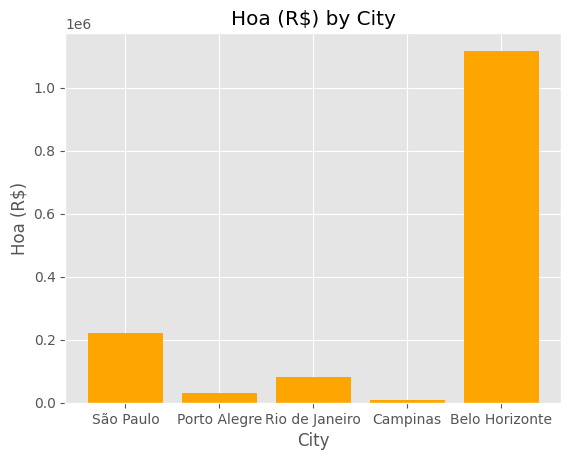

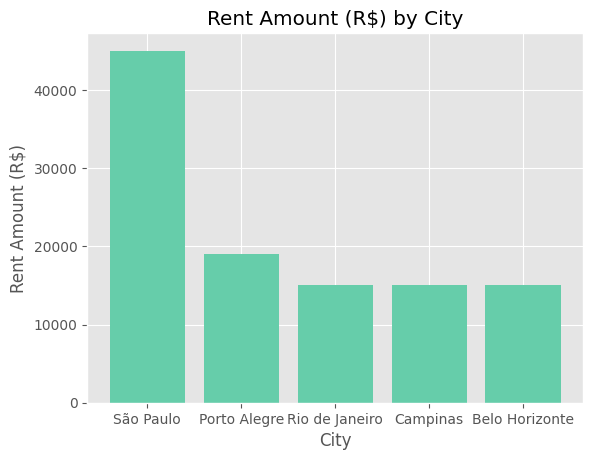

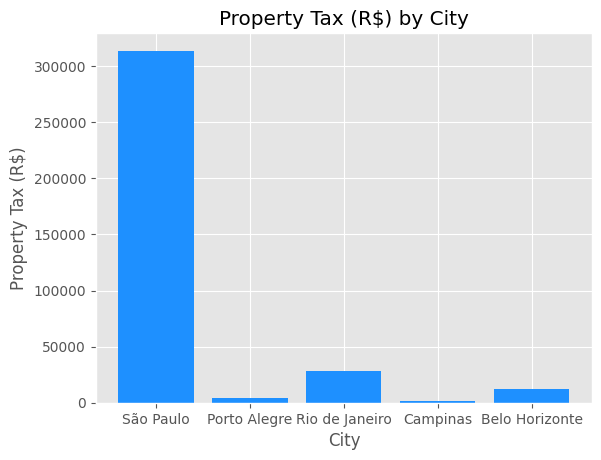

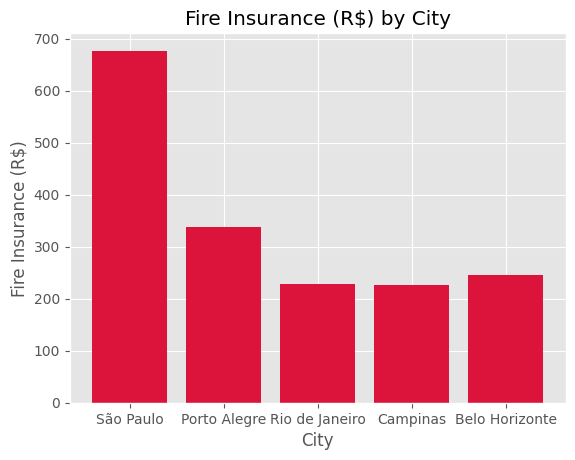

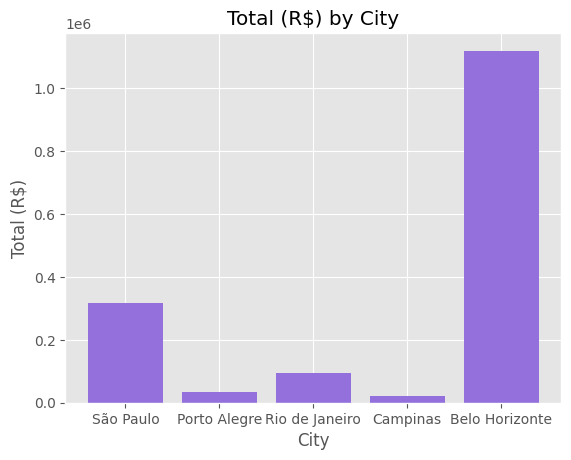

In [14]:
for i, amount in enumerate(amount_list):
  plt.bar(x=df['city'], height = df[amount], color = color_list[i])
  plt.xlabel('City')
  plt.ylabel(f'{amount.title()}')
  plt.title(f'{amount.title()} by City')
  plt.show()

The highest total by City by city amongst the different category is shared between São Paulo and Belo Horizonte. Meaning between the five cities the two cities are the one you are mostlikely to pay higher fees. While Porto Alegre and campinas are the frequent low fees, meaning this is the area mostly likely to have lower fees. While also Rio de Janeiro is high in some and low in some leaving it in the middle.

In [15]:
df['bathroom'].nunique()

10

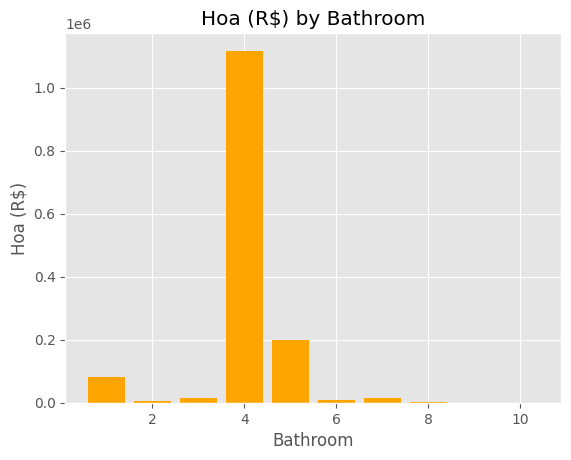

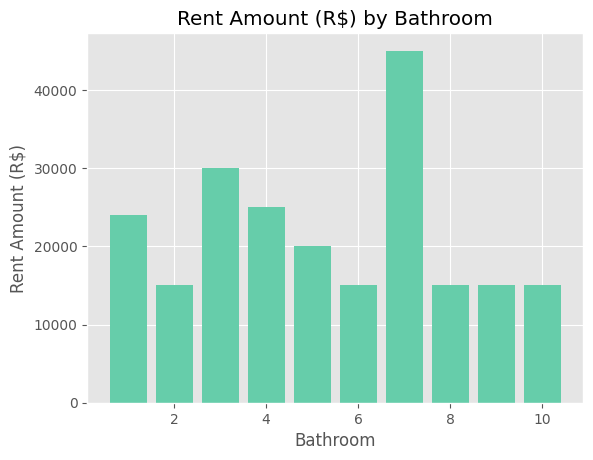

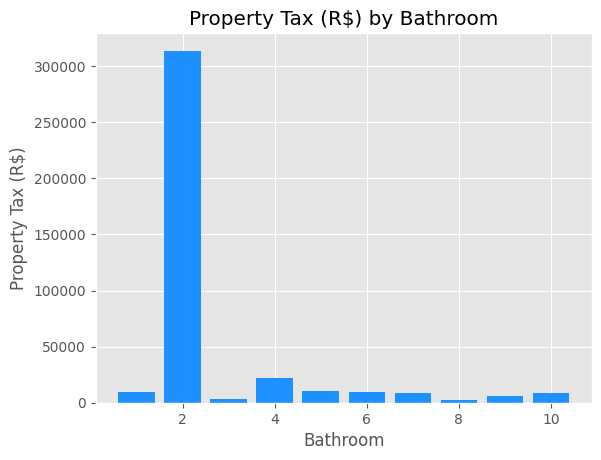

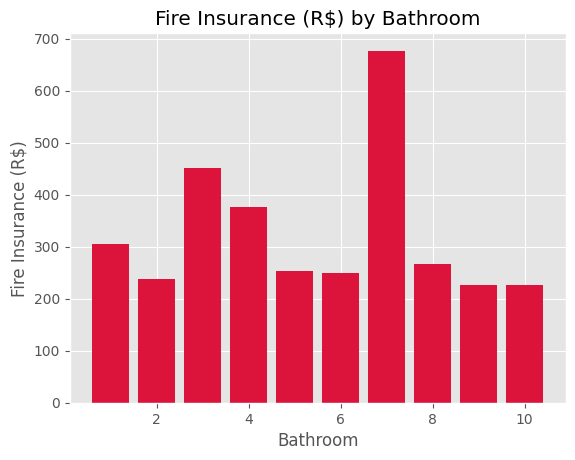

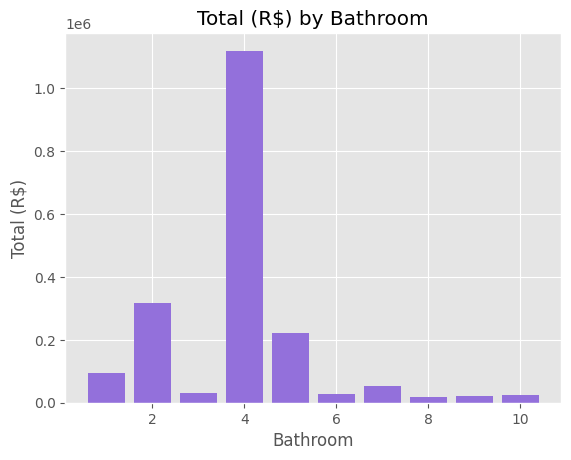

In [16]:
for i, amount in enumerate(amount_list):
  plt.bar(x=df['bathroom'], height = df[amount], color = color_list[i])
  plt.xlabel('Bathroom')
  plt.ylabel(f'{amount.title()}')
  plt.title(f'{amount.title()} by Bathroom')
  plt.show()

The bar charts do not show a consistent pattern, though 4 bathrooms has the most expensive total and hoa. according to the data a 4 bathroom house proves to be on the higher side of costs in terms of the total amount and hoa.

In [17]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

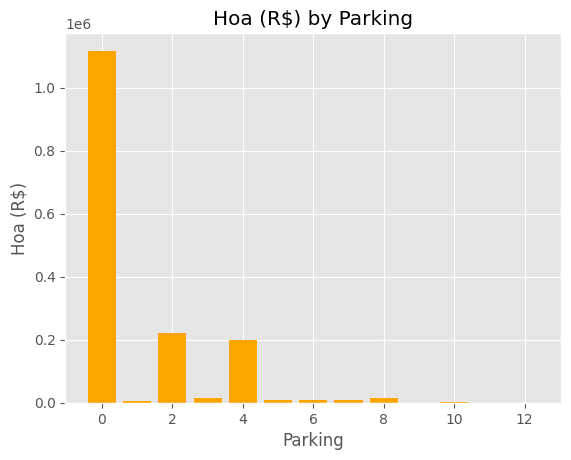

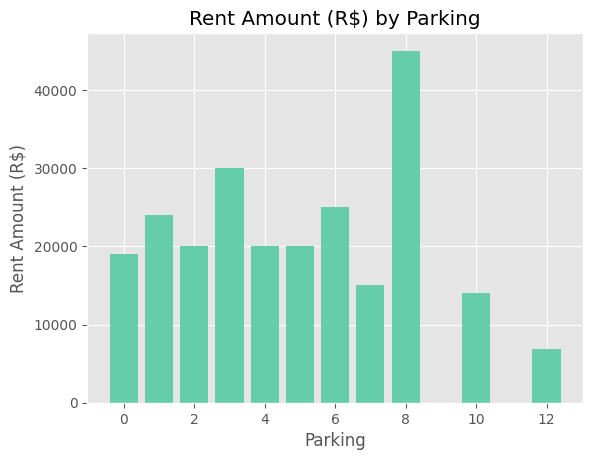

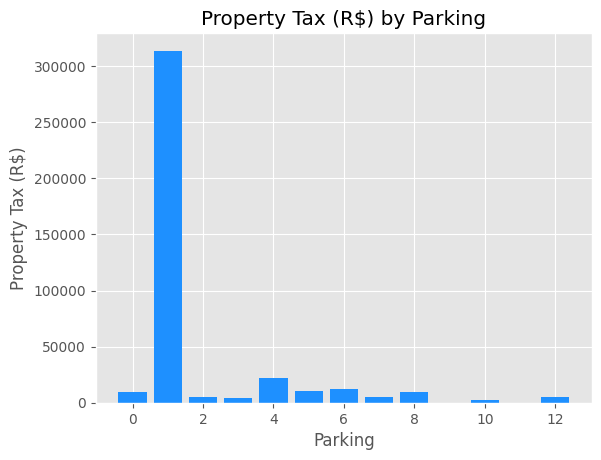

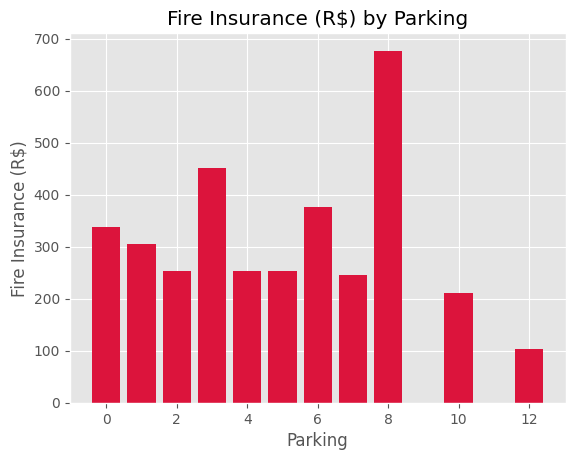

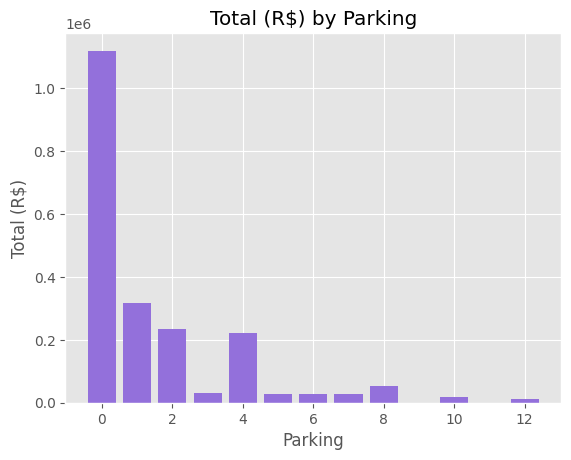

In [18]:
for i, amount in enumerate(amount_list):
  plt.bar(x=df['parking spaces'], height=df[amount], color = color_list[i])
  plt.xlabel('Parking')
  plt.ylabel(f'{amount.title()}')
  plt.title(f'{amount.title()} by Parking')
  plt.show()

0 parking is the highest when it comes to the total price and hoa. While 8 parking is the highest when it comes to rent amount and fire insurance. The patterns are not consistent in this chart too.

In [19]:
df.dtypes

,0
city,object
area,int64
rooms,int64
bathroom,int64
parking spaces,int64
floor,Int64
animal,object
furniture,object
hoa (R$),int64
rent amount (R$),int64


Floor had missing values so it will be plotted after filling it.

In [20]:
#This has missing values it will be ran aftyer filling missing values

'''for i, amount in enumerate(amount_list):
  plt.bar(x=df['floor'], height = df[amount], color = color_list[i])
  plt.xlabel('Floor')
  plt.ylabel(f'{amount.title()}')
  plt.title(f'{amount.title()} by Floor')
  plt.show()'''

"for i, amount in enumerate(amount_list):\n  plt.bar(x=df['floor'], height = df[amount], color = color_list[i])\n  plt.xlabel('Floor')\n  plt.ylabel(f'{amount.title()}')\n  plt.title(f'{amount.title()} by Floor')\n  plt.show()"

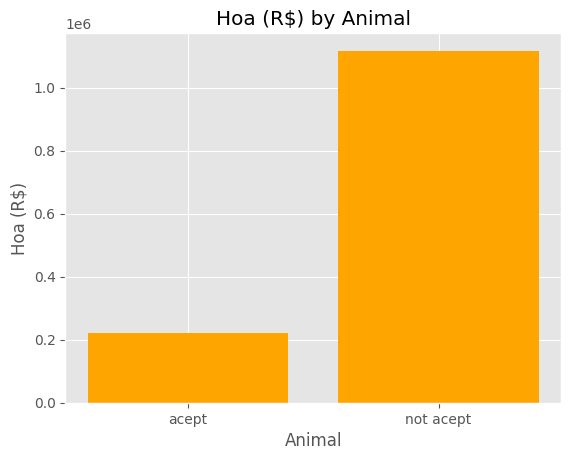

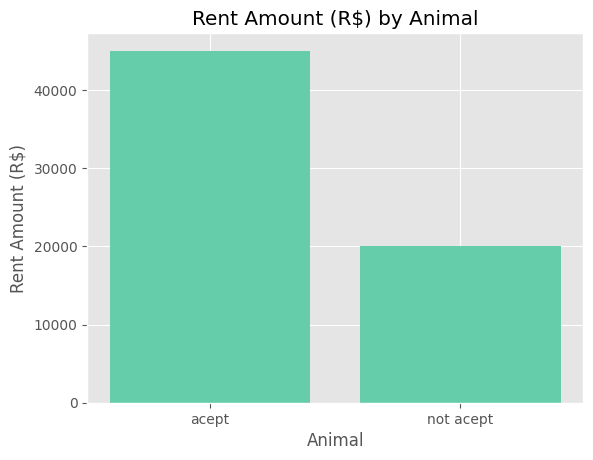

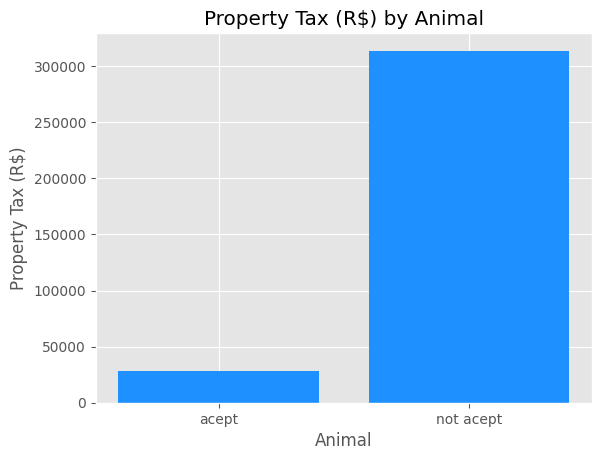

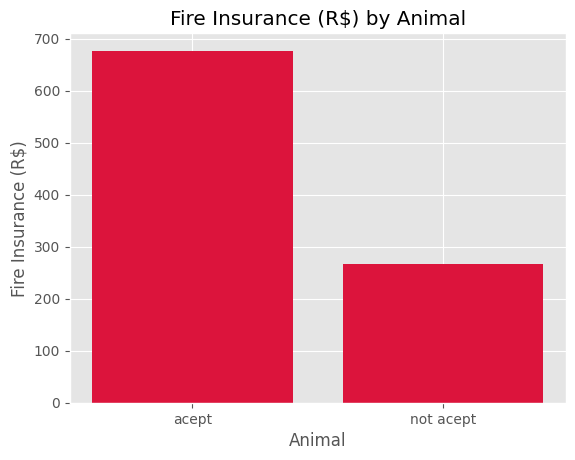

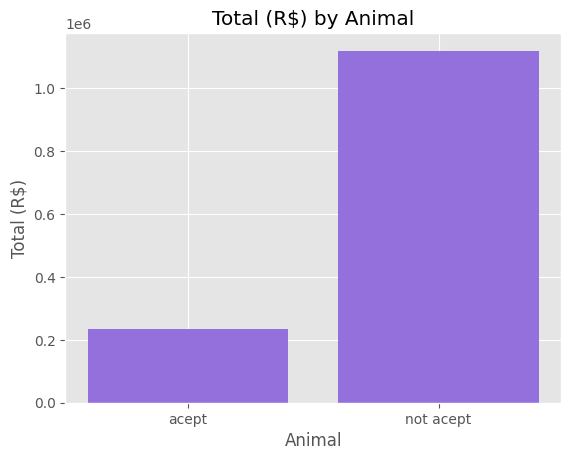

In [21]:
for i, amount in enumerate(amount_list):
  plt.bar(x=df['animal'], height = df[amount], color = color_list[i])
  plt.xlabel('Animal')
  plt.ylabel(f'{amount.title()}')
  plt.title(f'{amount.title()} by Animal')
  plt.show()

The charts above have no consistent pattern themselves. Except then when it higher on one side, the next chart is higher on the opposite side.

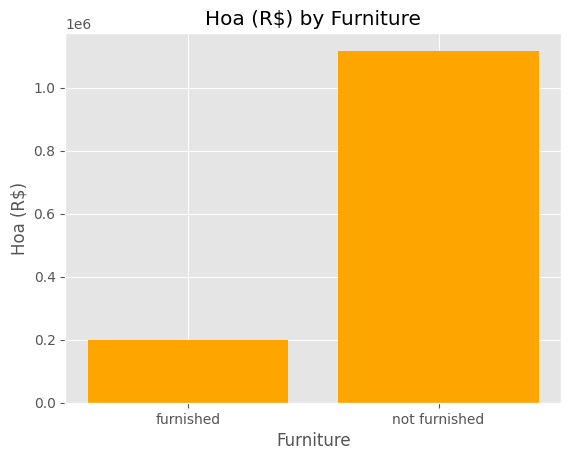

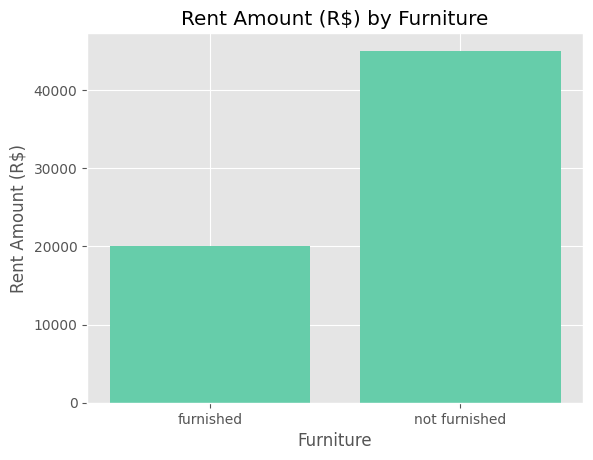

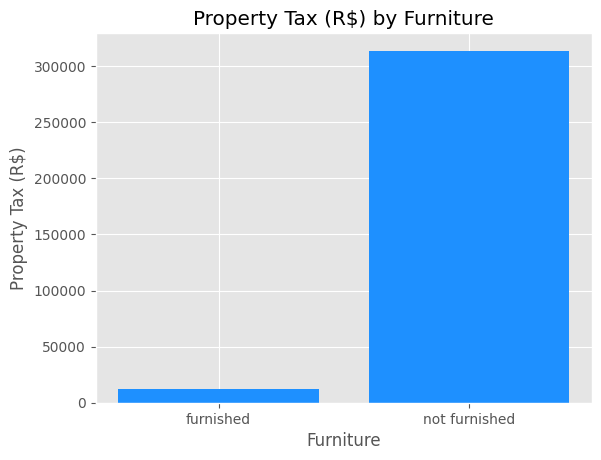

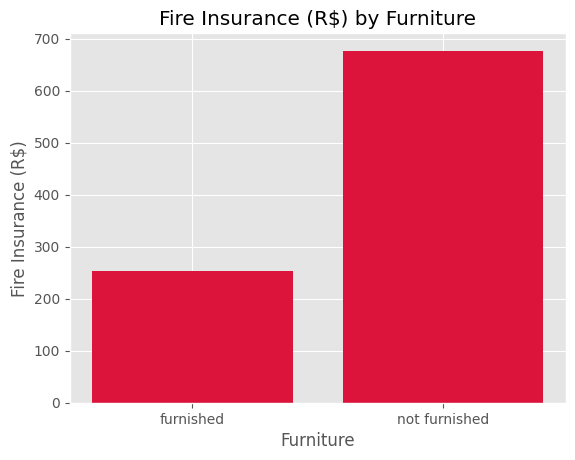

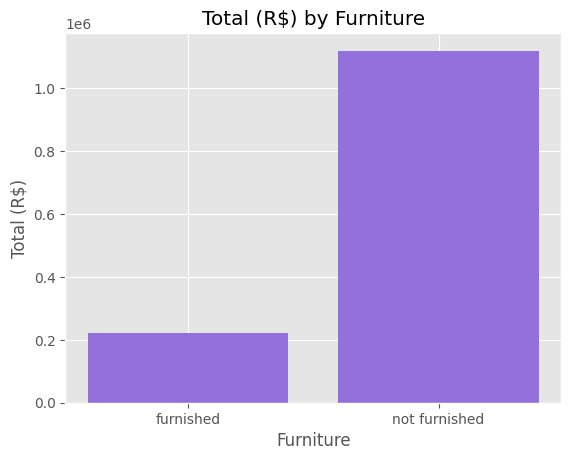

In [22]:
for i, amount in enumerate(amount_list):
  plt.bar(x=df['furniture'], height = df[amount], color = color_list[i])
  plt.xlabel('Furniture')
  plt.ylabel(f'{amount.title()}')
  plt.title(f'{amount.title()} by Furniture')
  plt.show()

This chart has a consistent pattern furnished houses cost less in all the categories. This is not normal as houses with furniture normally cost more. Though this does not show the full picture maybe the area is smaller for the furnished houses. There are many possibilities and this journey will continue to understand the story of the data.

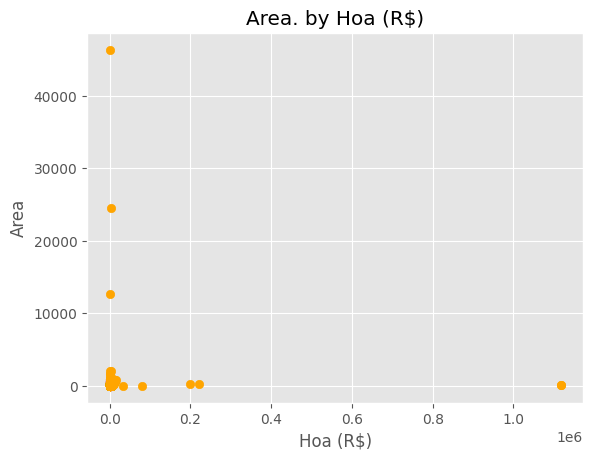

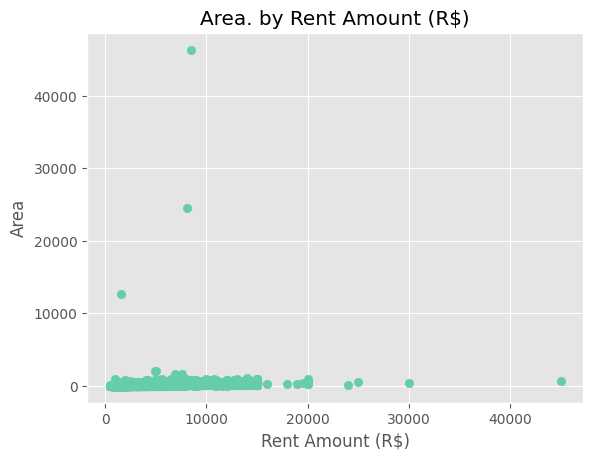

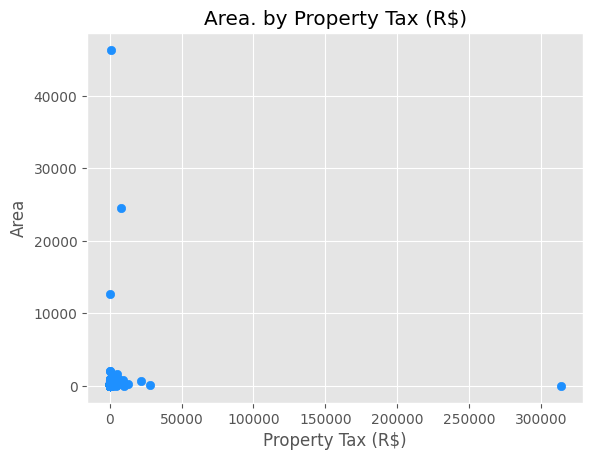

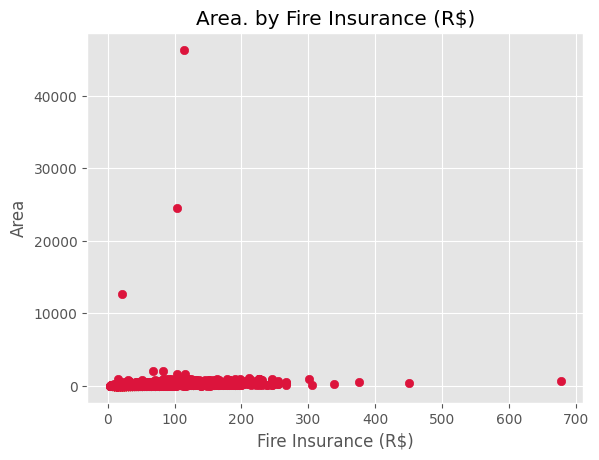

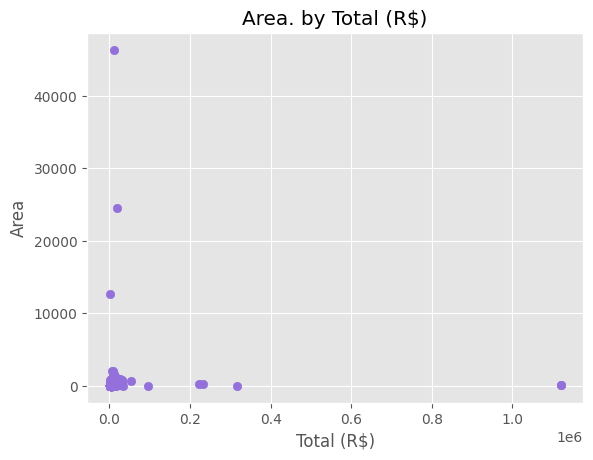

In [23]:
for i, amount in enumerate(amount_list):
  plt.scatter(x= df[amount], y=df['area'], color = color_list[i])
  plt.xlabel(f'{amount.title()}')
  plt.ylabel('Area')
  plt.title(f'Area. by {amount.title()}')
  plt.show()

The scatter plots show outliers on the data.

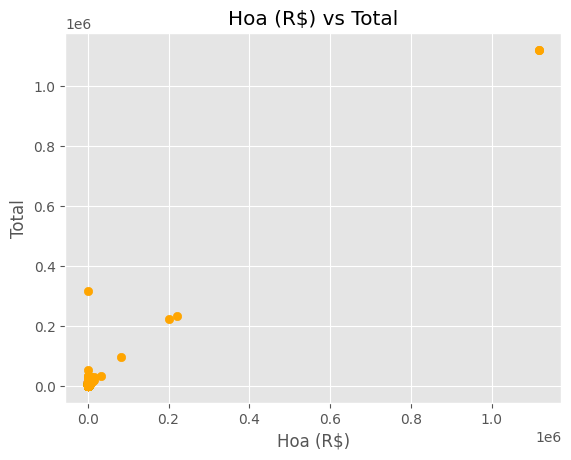

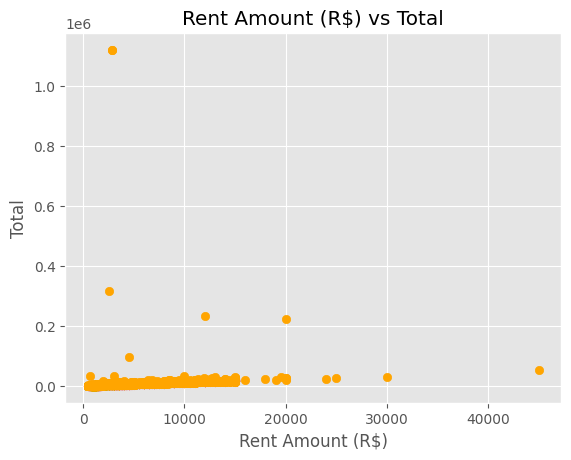

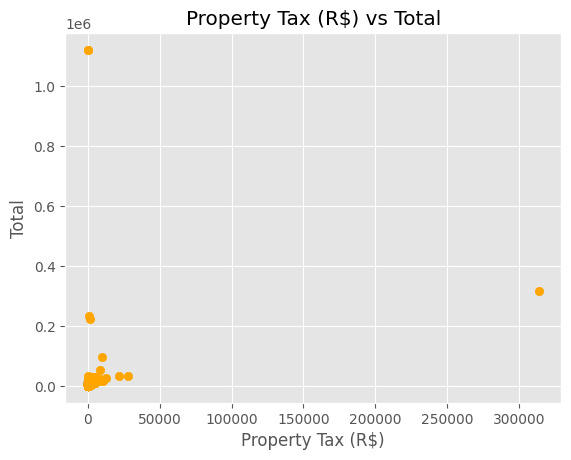

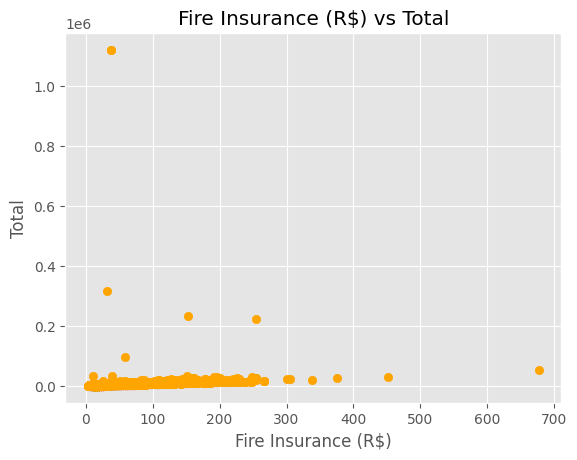

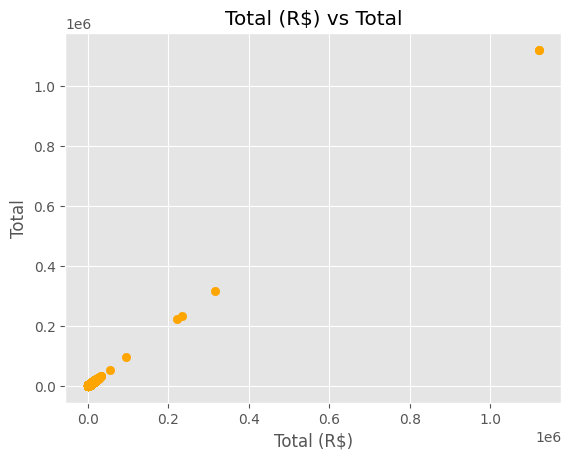

In [24]:
for i, amount in enumerate(amount_list):
  plt.scatter(x=df[amount], y=df['total (R$)'], color='orange')
  plt.xlabel(f'{amount.title()}')
  plt.ylabel('Total')
  plt.title(f'{amount.title()} vs Total')
  plt.show()

The scatterplot shows a lot of outliers against the total.

In [25]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

# **2. Data Cleaning**

### **2.1 Check for missing values**

In [26]:
df.isna().sum()/len(df)*100

,0
city,0.000000
area,0.000000
rooms,0.000000
bathroom,0.000000
parking spaces,0.000000
floor,23.017209
animal,0.000000
furniture,0.000000
hoa (R$),0.000000
rent amount (R$),0.000000


floor is the only column with missing variable and it has 23% missing values. So I will fill it with a median as the mean is easily impacted by outliers.

In [27]:
df['floor'].unique()

<IntegerArray>
[   7,   20,    6,    2,    1, <NA>,    4,    3,   10,   11,   24,    9,    8,
   17,   18,    5,   13,   15,   16,   14,   26,   12,   21,   19,   22,   27,
   23,   35,   25,   46,   28,   29,  301,   51,   32]
Length: 35, dtype: Int64

# **NB:**

We will call the data frame that we will be altering df2

In [28]:
df['floor'].median()

5.0

In [29]:
df2 = df.copy()
df2['floor'].fillna(df2['floor'].median(), inplace=True)  # Fill missing values with the median
df2.isna().sum()/len(df2)*100  #check percentage of missing values if 0 for all then data has been filled

,0
city,0.0
area,0.0
rooms,0.0
bathroom,0.0
parking spaces,0.0
floor,0.0
animal,0.0
furniture,0.0
hoa (R$),0.0
rent amount (R$),0.0


### **2.2 Outlier removal**

we will use z-score for this project.

In [30]:
df2.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.0,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,6.218855,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,5.44035,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,1.0,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,3.0,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.0,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.0,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.0,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [31]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


We will first select numeric data type columns then plot boxplots to see outliers.

In [32]:
numeric_columns = df2.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)',
       'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)',
       'total (R$)'],
      dtype='object')

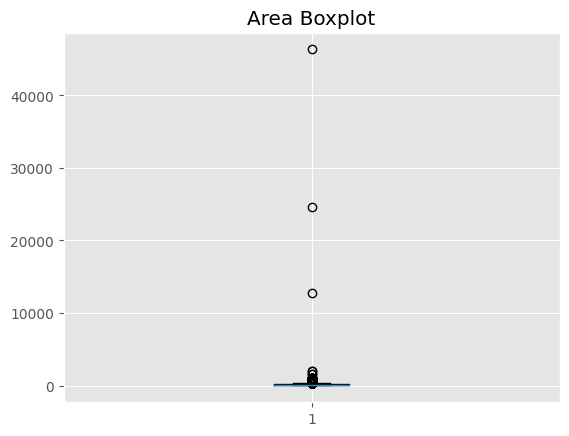

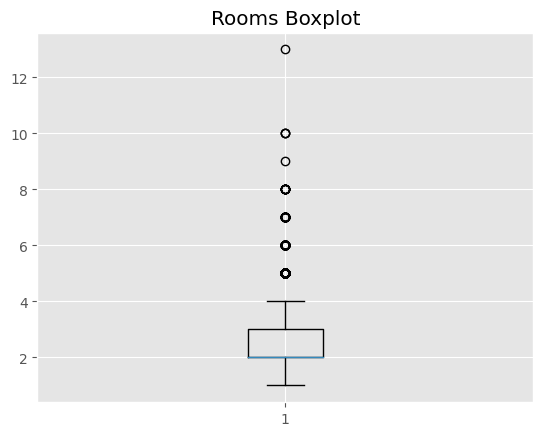

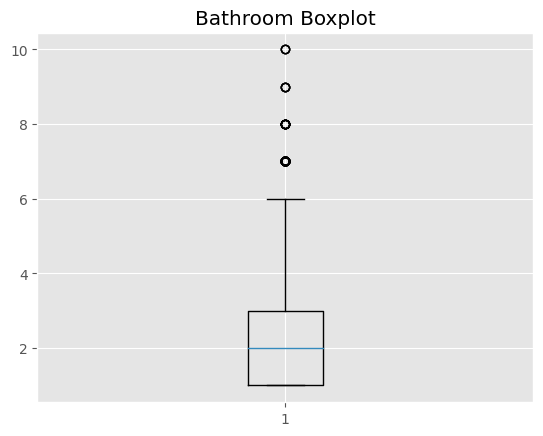

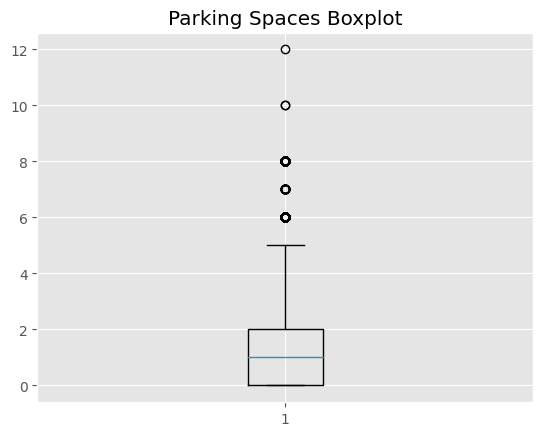

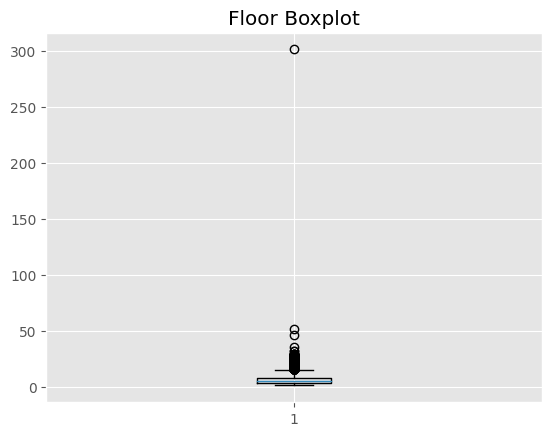

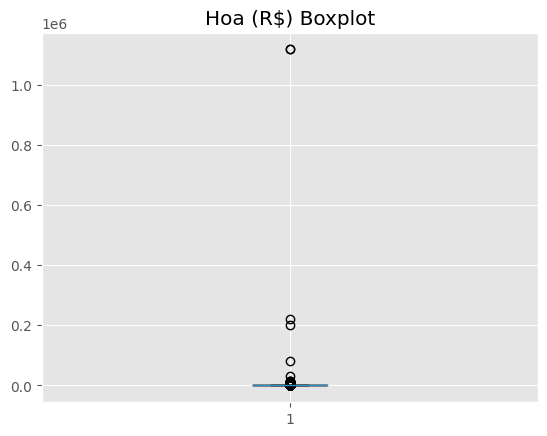

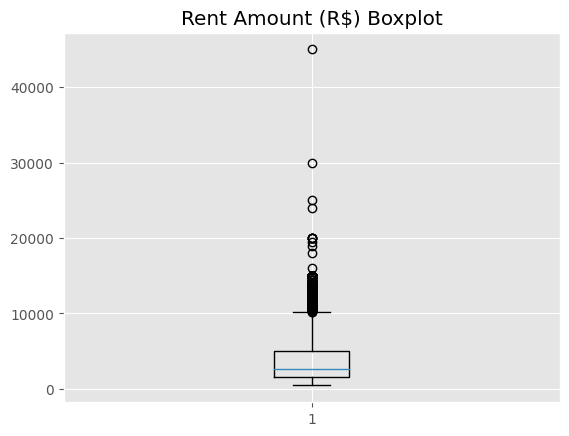

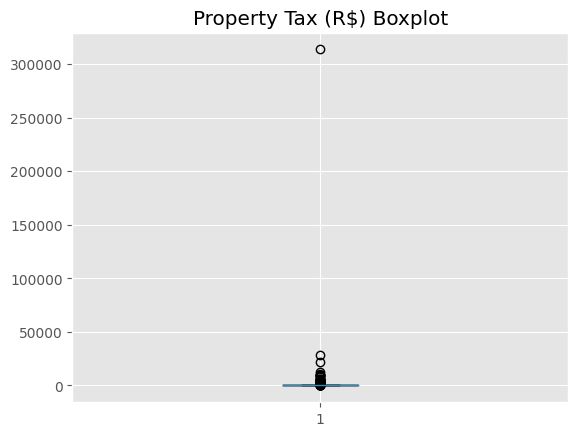

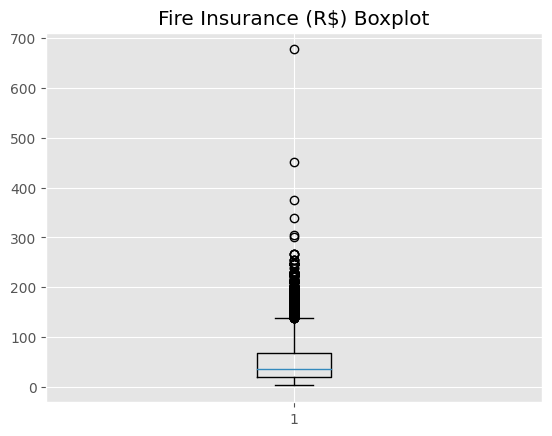

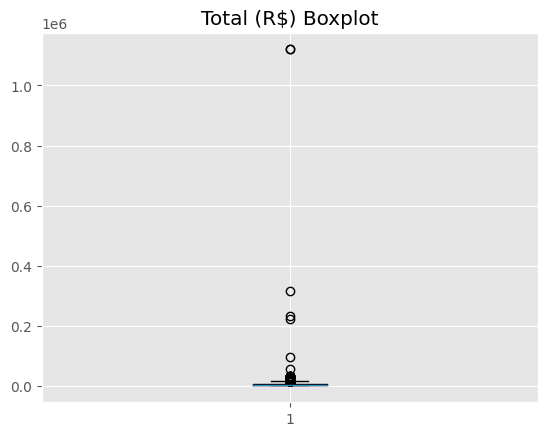

In [33]:
for i, num in enumerate(numeric_columns):
  plt.boxplot(df2[num])
  plt.title(f'{num.title()} Boxplot')
  plt.show()

This data set seems to have a lot of outliers in it. we will select specific column removal. we will take the amounts we had in amount_list plus area.

In [402]:
amount_list

['hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [403]:
outlier_list = amount_list + ['area']
outlier_list

['hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)',
 'area']

Z = (score - mean)/ std

In [404]:
for outlier in outlier_list:
        mean = df2[outlier].mean()
        std = df2[outlier].std()
        z_score = (df2[outlier] - mean) / std
        df2[outlier + '_z_score'] = z_score

In [405]:
df2.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),hoa (R$)_z_score,rent amount (R$)_z_score,property tax (R$)_z_score,fire insurance (R$)_z_score,total (R$)_z_score,area_z_score
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,2.984740,0.910492,0.843912,0.768553,1.715507,-0.191437
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,0.832630,0.490079,-0.933466,0.705580,0.574663,0.054326
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,-0.642526,-0.929237,-0.748147,-0.805762,-0.978990,-0.658386
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,-1.188131,-1.191575,-0.722876,-1.183598,-1.354563,-1.297369
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750,0.307232,-0.266665,-0.217461,-0.301981,-0.125765,-0.142284


In [406]:
df2.shape

(7411, 19)

In [407]:
condition = pd.Series([True] * len(df2), index=df2.index)

for outlier in outlier_list:
  outlier_column = outlier + '_z_score'
  condition &= (df2[outlier_column] <= 3) & (df2[outlier_column] >= -3)

df_no_outliers = df2[condition]

Let us test this using hoa (R$)_z_score column and total (R$)_z_score

In [408]:
df_no_outliers.shape

(7078, 19)

In [409]:
df_no_outliers[(df_no_outliers['hoa (R$)_z_score'] >3) | (df_no_outliers['hoa (R$)_z_score'] < -3)]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),hoa (R$)_z_score,rent amount (R$)_z_score,property tax (R$)_z_score,fire insurance (R$)_z_score,total (R$)_z_score,area_z_score


In [410]:
df_no_outliers[(df_no_outliers['total (R$)_z_score'] >3) | (df_no_outliers['total (R$)_z_score'] < -3)]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),hoa (R$)_z_score,rent amount (R$)_z_score,property tax (R$)_z_score,fire insurance (R$)_z_score,total (R$)_z_score,area_z_score


As we can see there are no rows showing.

In [411]:
df_no_outliers.shape

(7078, 19)

Ensure that the removal of outliers hasn't introduced missing values.

In [412]:
df_no_outliers.isna().sum()

,0
city,0
area,0
rooms,0
bathroom,0
parking spaces,0
floor,0
animal,0
furniture,0
hoa (R$),0
rent amount (R$),0


In [413]:
df_no_outliers.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),hoa (R$)_z_score,rent amount (R$)_z_score,property tax (R$)_z_score,fire insurance (R$)_z_score,total (R$)_z_score,area_z_score
count,7078.000000,7078.000000,7078.000000,7078.000000,7078.0,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000
mean,74.826505,2.005086,1.536168,0.910427,5.835688,558.081520,2134.690732,100.157389,28.695959,2821.807431,-0.060382,-0.069331,-0.089781,-0.069237,-0.079664,-0.072819
std,37.710343,0.869938,0.732792,0.867937,5.696878,448.222047,1113.151234,102.861894,14.851142,1447.291692,0.905750,0.935967,0.866467,0.935215,0.929169,0.926779
min,11.000000,1.000000,1.000000,0.000000,1.0,0.000000,450.000000,0.000000,3.000000,499.000000,-1.188131,-1.485864,-0.933466,-1.687379,-1.570919,-1.641436
25%,48.000000,1.000000,1.000000,0.000000,3.0,250.000000,1250.000000,17.000000,17.000000,1689.000000,-0.682941,-0.813203,-0.790265,-0.805762,-0.806932,-0.732115
50%,67.000000,2.000000,1.000000,1.000000,5.0,487.000000,1862.500000,70.000000,25.000000,2516.500000,-0.204021,-0.298196,-0.343815,-0.301981,-0.275673,-0.265166
75%,95.000000,3.000000,2.000000,1.000000,8.0,800.000000,2800.000000,147.000000,37.000000,3705.750000,0.428478,0.490079,0.304802,0.453690,0.487832,0.422970
max,198.000000,7.000000,7.000000,10.000000,301.0,2065.000000,5700.000000,465.000000,77.000000,7590.000000,2.984740,2.928476,2.983504,2.972594,2.981542,2.954324


Now we will drop the z score columns as we will no longer be using them.

In [414]:
df_no_outliers.drop(columns=[col + '_z_score' for col in outlier_list], inplace=True)
df_no_outliers.head()

<ipython-input-414-67d94093e2d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(columns=[col + '_z_score' for col in outlier_list], inplace=True)


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750


We will select all numeric columns and to show how correlated are the columns to the target. In addition, those closely correlated we will consider dropping them to avoid bias.

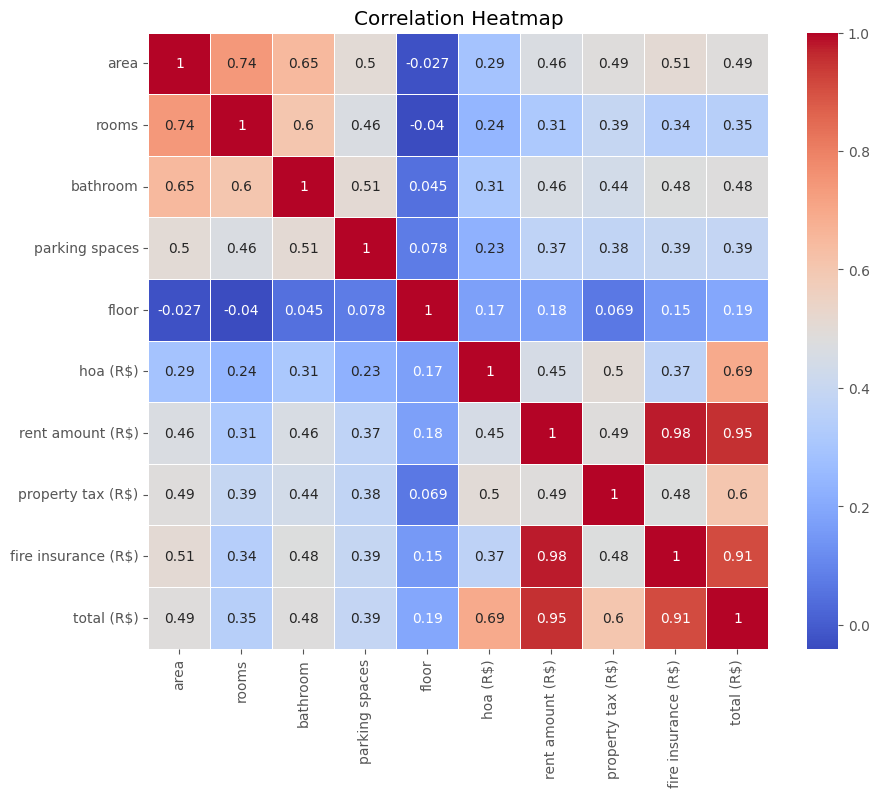

In [415]:
corr_columns = df_no_outliers.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = corr_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Take Rooms, bathrrom, parking. Then take the categorical variables.

Rooms, area and bathroom are highly correlated so I chose one.

In [416]:
df_no_outliers.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [417]:
df_selected_features = df_no_outliers.drop(['area','bathroom','floor','hoa (R$)', 'property tax (R$)', 'parking spaces'], axis ='columns')
df_selected_features.head()

,city,rooms,animal,furniture,rent amount (R$),fire insurance (R$),total (R$)
0,São Paulo,2,acept,furnished,3300,42,5618
2,Porto Alegre,1,acept,not furnished,2800,41,3841
3,Porto Alegre,2,acept,not furnished,1112,17,1421
4,São Paulo,1,not acept,not furnished,800,11,836
6,Rio de Janeiro,2,acept,not furnished,1900,25,2750


In [418]:
df_selected_features.columns

Index(['city', 'rooms', 'animal', 'furniture', 'rent amount (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [419]:
df_selected_features.shape

(7078, 7)

# **3. Feature Engineering**

### **3.1 Scale the data with high STD**

### **3.2 label encode values categorical variables**

In [420]:
def cat_to_num(df_selected_features,col):
    dummy = pd.get_dummies(df_selected_features[col])
    del dummy[dummy.columns[-1]]#To avoid dummy variable trap
    df_selected_features= pd.concat([df_selected_features,dummy],axis =1)
    return df_selected_features



for i in df_selected_features.columns:
    if df_selected_features[i].dtype == object:
        print(i)
        df_selected_features =cat_to_num(df_selected_features,i)

city
animal
furniture


In [421]:
df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7078 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 7078 non-null   object
 1   rooms                7078 non-null   int64 
 2   animal               7078 non-null   object
 3   furniture            7078 non-null   object
 4   rent amount (R$)     7078 non-null   int64 
 5   fire insurance (R$)  7078 non-null   int64 
 6   total (R$)           7078 non-null   int64 
 7   Belo Horizonte       7078 non-null   bool  
 8   Campinas             7078 non-null   bool  
 9   Porto Alegre         7078 non-null   bool  
 10  Rio de Janeiro       7078 non-null   bool  
 11  acept                7078 non-null   bool  
 12  furnished            7078 non-null   bool  
dtypes: bool(6), int64(4), object(3)
memory usage: 483.8+ KB


In [422]:
df_selected_features.drop(['city','furniture','animal'],axis =1,inplace =True)
df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7078 entries, 0 to 10691
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   rooms                7078 non-null   int64
 1   rent amount (R$)     7078 non-null   int64
 2   fire insurance (R$)  7078 non-null   int64
 3   total (R$)           7078 non-null   int64
 4   Belo Horizonte       7078 non-null   bool 
 5   Campinas             7078 non-null   bool 
 6   Porto Alegre         7078 non-null   bool 
 7   Rio de Janeiro       7078 non-null   bool 
 8   acept                7078 non-null   bool 
 9   furnished            7078 non-null   bool 
dtypes: bool(6), int64(4)
memory usage: 318.0 KB


In [423]:
df_selected_features.head()

,rooms,rent amount (R$),fire insurance (R$),total (R$),Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,acept,furnished
0,2,3300,42,5618,False,False,False,False,True,True
2,1,2800,41,3841,False,False,True,False,True,False
3,2,1112,17,1421,False,False,True,False,True,False
4,1,800,11,836,False,False,False,False,False,False
6,2,1900,25,2750,False,False,False,True,True,False


In [424]:
# Transform all boolean columns into integers
df_selected_features = df_selected_features.astype(int)

# Display the first few rows
df_selected_features.head()

,rooms,rent amount (R$),fire insurance (R$),total (R$),Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,acept,furnished
0,2,3300,42,5618,0,0,0,0,1,1
2,1,2800,41,3841,0,0,1,0,1,0
3,2,1112,17,1421,0,0,1,0,1,0
4,1,800,11,836,0,0,0,0,0,0
6,2,1900,25,2750,0,0,0,1,1,0


# **4. Model Development**

In [425]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [426]:
x = df_selected_features.drop('total (R$)', axis='columns')
y = df_selected_features['total (R$)']

In [427]:
from re import X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9168444001061135

In [428]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,y):
  models = {
    'lr':{
        'model': LinearRegression(),
        'params':{
            #'normalize': [True, False]
        }
    },
    'dtc':{
        'model': DecisionTreeRegressor(),
        'params':{
            'criterion': ['squared_error', 'absolute_error']
        }
    },
    'lasso':{
        'model': Lasso(),
        'params':{
            'alpha': [1, 2, 10, 100],
            'selection': ['cyclic', 'random']
        }
    }
    }

  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #to randomly shuffle to get better result.
  for model_name, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

Let us call teh function to see the results

In [429]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,lr,0.925751,{}


# **5. Model Evaluation**